In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# test_df = abs_unson # make it so in dicitonary form so can add unlimited aoutns of nest 

# for row in test_df.iterrows():
#     print(row)

In [35]:
data = pd.read_csv(r'05_11_21_CdSe_Abs') # add time so that you can pull from the same
wavelength_columns = [col for col in data.columns if "nm" in col]
wavelengths = [float(w.replace("nm", "")) for w in wavelength_columns]
data

,UID,Sonication Time (Min),Labware,Slot,Well,CdAc concentration molarity,Se concentration molarity,OleicAc concentration molarity,Oleylamine concentration molarity,CdAc amount mass g,...,990nm,991nm,992nm,993nm,994nm,995nm,996nm,997nm,998nm,999nm
0,S2_A1_05-14-2021_CdSe,0,Fischer 24 Well Plate 7400 ÂµL,2,A1,0.0,0.0,0.00,0.00,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S2_A2_05-14-2021_CdSe,0,Fischer 24 Well Plate 7400 ÂµL,2,A2,0.0,0.0,0.00,0.25,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S2_A3_05-14-2021_CdSe,0,Fischer 24 Well Plate 7400 ÂµL,2,A3,0.0,0.0,0.00,0.50,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S2_A4_05-14-2021_CdSe,0,Fischer 24 Well Plate 7400 ÂµL,2,A4,0.0,0.0,0.25,0.00,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S2_A5_05-14-2021_CdSe,0,Fischer 24 Well Plate 7400 ÂµL,2,A5,0.0,0.0,0.25,0.25,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,S6_A5_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,6,A5,0.1,0.1,0.25,0.25,0.11525,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
158,S6_A6_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,6,A6,0.1,0.1,0.25,0.50,0.11525,...,0.000,0.001,0.000,0.000,0.001,0.001,0.001,0.001,0.001,0.001
159,S6_B1_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,6,B1,0.1,0.1,0.50,0.00,0.11525,...,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
160,S6_B2_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,6,B2,0.1,0.1,0.50,0.25,0.11525,...,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.001


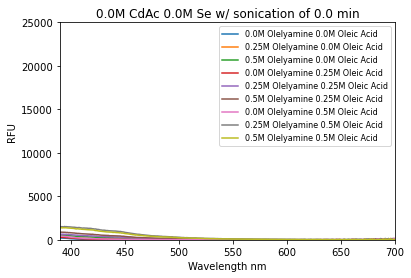

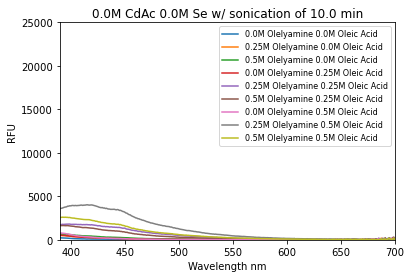

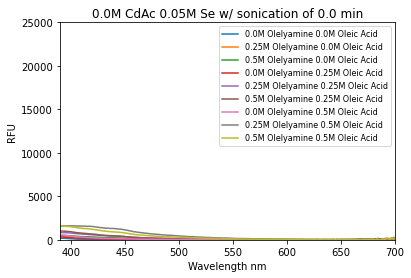

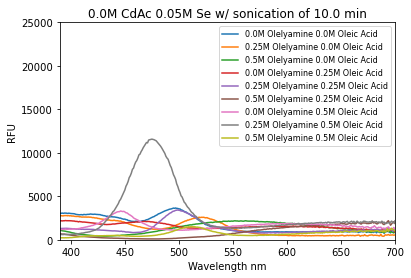

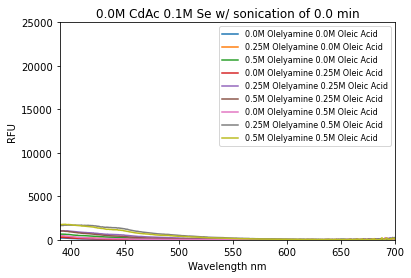

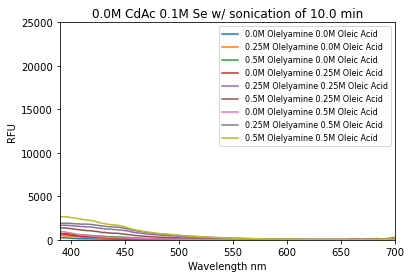

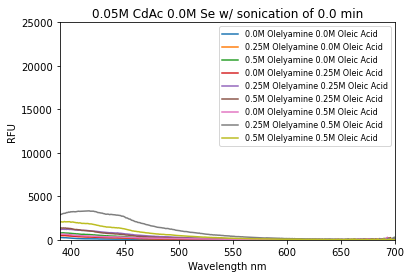

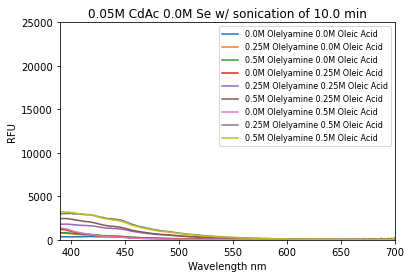

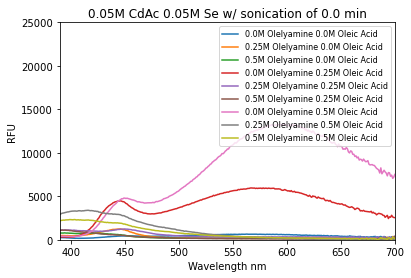

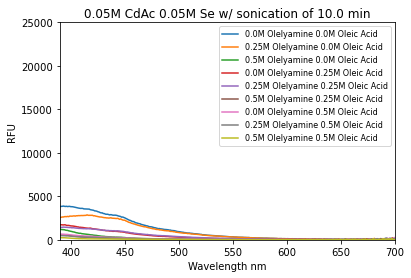

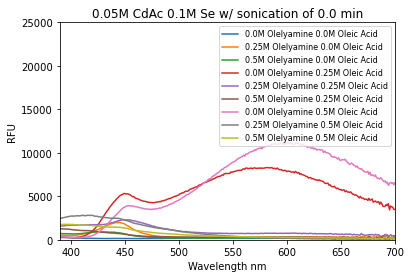

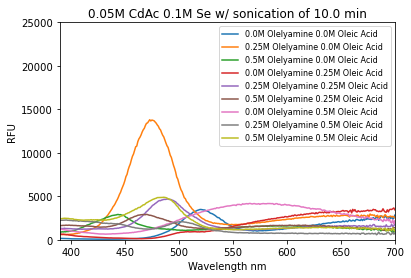

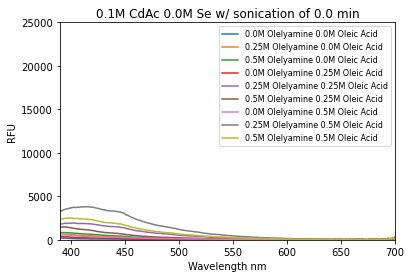

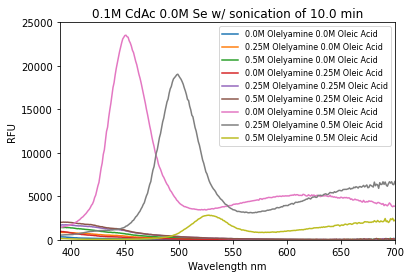

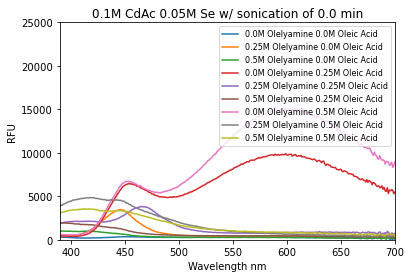

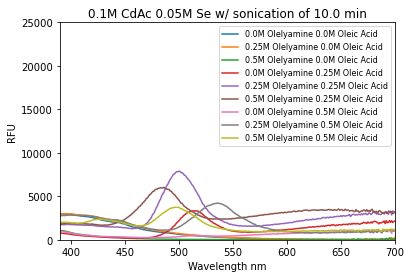

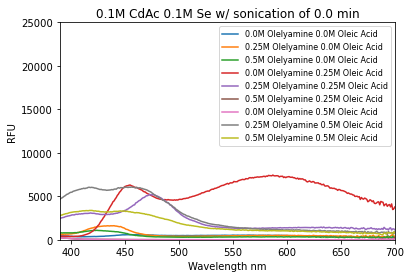

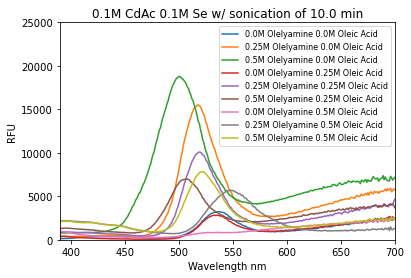

In [34]:
cd_grouper = data.groupby('CdAc concentration molarity') 
for cd_conc, unique_cd_df, in cd_grouper:
    se_grouper = unique_cd_df.groupby('Se concentration molarity')
    n_se = len(se_grouper)

    
    for se_conc, unique_se_cd_df in se_grouper: # at this point the cd and se are fixed and the only thing you can change is the ligand
#         spectras = unique_se_cd_df[wavelength_columns]
        
        oleyl_grouper = unique_se_cd_df.groupby('Oleylamine concentration molarity')
        oa_grouper = unique_se_cd_df.groupby('OleicAc concentration molarity')
        
        # here you can split by time
        unique_se_cd_df_0 = unique_se_cd_df[unique_se_cd_df['Sonication Time (Min)']==0]
        fig, ax = plt.subplots(1)
        for i, row in unique_se_cd_df_0.iterrows():
            spectra = row[wavelength_columns]
            norm_spectra = spectra/spectra.max()
            a = row['Oleylamine concentration molarity']
            b = row['OleicAc concentration molarity']
            c = row['Sonication Time (Min)']
            label = str(a) +'M Olelyamine ' + str(b) +'M Oleic Acid'
            title = str(cd_conc) + 'M CdAc ' + str(se_conc) + 'M Se'+ ' w/ sonication of ' + str(c) + ' min'  
            ax.plot(wavelengths, spectra, label = label)
            ax.legend(loc=1, prop={'size': 8})
            ax.set_xlim(390,700)
            ax.set_ylim(0,25000)
            ax.set_title(title)
            ax.set_xlabel('Wavelength nm')
            ax.set_ylabel('RFU')
        
        unique_se_cd_df_10 = unique_se_cd_df[unique_se_cd_df['Sonication Time (Min)']==10]
        fig, ax = plt.subplots(1)
        for i, row in unique_se_cd_df_10.iterrows():
            spectra = row[wavelength_columns]
            norm_spectra = spectra/spectra.max()
            a = row['Oleylamine concentration molarity']
            b = row['OleicAc concentration molarity']
            c = row['Sonication Time (Min)']
            label = str(a) +'M Olelyamine ' + str(b) +'M Oleic Acid' 
            title = str(cd_conc) + 'M CdAc ' + str(se_conc) + 'M Se'+ ' w/ sonication of ' + str(c) + ' min'
            ax.plot(wavelengths, spectra, label = label)
            ax.legend(loc=1, prop={'size': 8})
            ax.set_xlim(390,700)
            ax.set_ylim(0,25000)
            ax.set_title(title)
            ax.set_xlabel('Wavelength nm')
            ax.set_ylabel('RFU')
#     n_plots = n_se
#     n_cols = 1
#     n_rows = n_se # (n_plots + 1) // n_cols
#     fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)


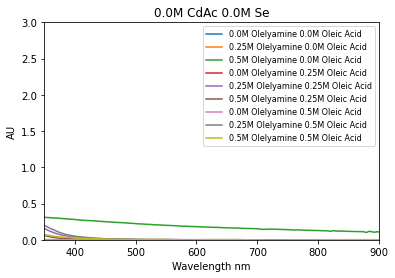

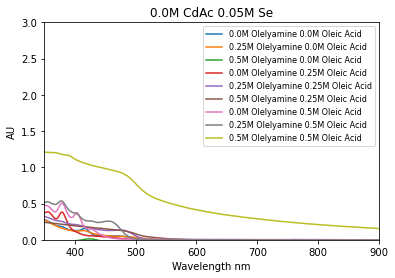

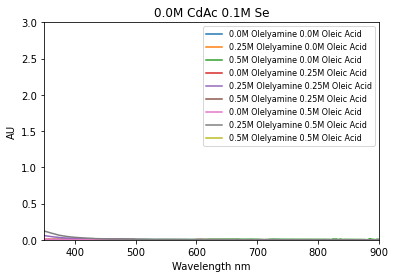

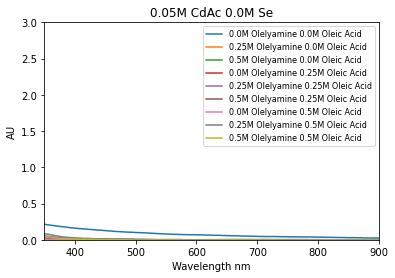

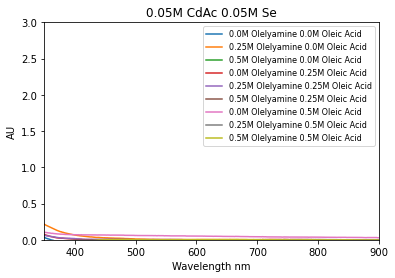

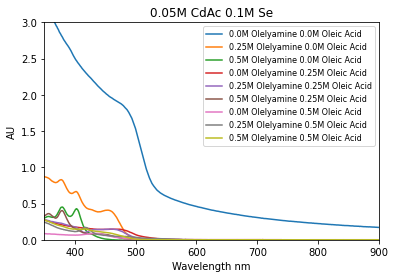

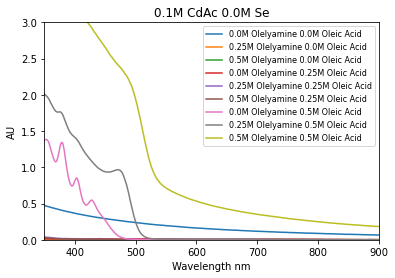

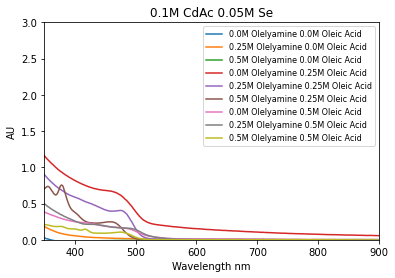

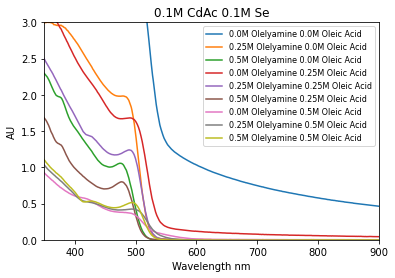

In [40]:
cd_grouper = data.groupby('CdAc concentration molarity') 
for cd_conc, unique_cd_df, in cd_grouper:
    se_grouper = unique_cd_df.groupby('Se concentration molarity')
    n_se = len(se_grouper)

    
    for se_conc, unique_se_cd_df in se_grouper: # at this point the cd and se are fixed and the only thing you can change is the ligand
#         spectras = unique_se_cd_df[wavelength_columns]
        
        oleyl_grouper = unique_se_cd_df.groupby('Oleylamine concentration molarity')
        oa_grouper = unique_se_cd_df.groupby('OleicAc concentration molarity')
        
        # here you can split by time
        unique_se_cd_df_0 = unique_se_cd_df[unique_se_cd_df['Sonication Time (Min)']==0]
        unique_se_cd_df_10 = unique_se_cd_df[unique_se_cd_df['Sonication Time (Min)']==10]
        unique_se_cd_df_10.reset_index(inplace = True)
        unique_se_cd_df_0.reset_index(inplace = True)
        fig, ax = plt.subplots(1)
        for i, row in unique_se_cd_df_0.iterrows():
            spectra = row[wavelength_columns]
            spectra_2 = unique_se_cd_df_10.iloc[i][wavelength_columns]
            spectra_3 = spectra_2 - spectra.values
            a = row['Oleylamine concentration molarity']
            b = row['OleicAc concentration molarity']
            c = row['Sonication Time (Min)']
            label = str(a) +'M Olelyamine ' + str(b) +'M Oleic Acid' 
            title = str(cd_conc) + 'M CdAc ' + str(se_conc) + 'M Se'
            ax.plot(wavelengths, spectra_3, label = label)
            ax.legend(loc=1, prop={'size': 8})
            ax.set_xlim(350,900)
            ax.set_ylim(0,3)
            ax.set_title(title)
            ax.set_xlabel('Wavelength nm')
            ax.set_ylabel('AU')
        
#         unique_se_cd_df_10 = unique_se_cd_df[unique_se_cd_df['Sonication Time (Min)']==10]
#         fig, ax = plt.subplots(1)
#         for i, row in unique_se_cd_df_10.iterrows():
#             spectra = row[wavelength_columns]
#             a = row['Oleylamine concentration molarity']
#             b = row['OleicAc concentration molarity']
#             c = row['Sonication Time (Min)']
#             label = str(a) +'M Olelyamine ' + str(b) +'M Oleic Acid' 
#             title = str(cd_conc) + 'M CdAc ' + str(se_conc) + 'M Se'+ ' w/ sonication of ' + str(c) + ' min'
#             ax.plot(wavelengths, spectra, label = label)
#             ax.legend(loc=1,bbox_to_anchor=(1.9, 1), prop={'size': 10})
#             ax.set_xlim(390,700)
#             ax.set_ylim(0,25000)
#             ax.set_title(title)
#             ax.set_xlabel('Wavelength nm')
#             ax.set_ylabel('RFU')
# #     n_plots = n_se
#     n_cols = 1
#     n_rows = n_se # (n_plots + 1) // n_cols
#     fig,axes = plt.subplots(nrows=n_rows, ncols=n_cols)


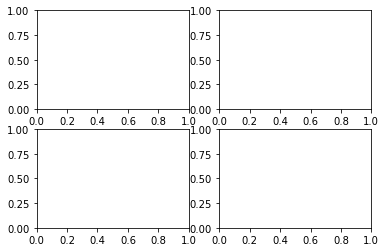

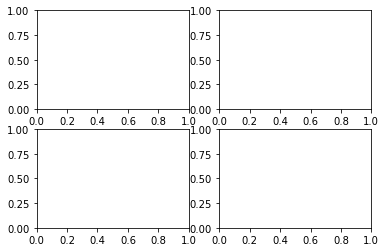

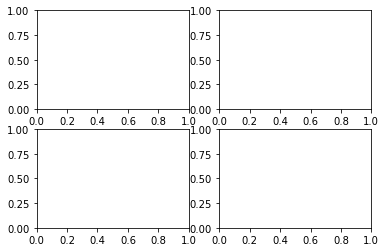

In [4]:
# so within each of these plots you can make a few subplots of the different compositions of ligand
# so you would have a plot focused on the base level of how much Cd so three, then those with X amount of selenium and then split those up into whetehr they had oelic and olelymine and tehe concentration
# so in total 3 * 3 = 9 * 2 = 18 plots
# N = 50
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.hot(np.linspace(0,1,N)))


cd_grouper = data.groupby('CdAc concentration molarity') 
# se_grouper = data.groupby('Se concentration molarity')
for cd_conc, unique_cd_df, in cd_grouper:
    se_grouper = unique_cd_df.groupby('Se concentration molarity')
    n_se = len(se_grouper)
    
    n_plots = n_se
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols
    fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols)
    
    # so now we have n_plots which is the number of selenium concs in ONE unique Cd conc
    # now within these subplots we iterate through them and plot other information like the olelyamine and oelic acid concentration 
    
    # just need to iterate linearly or do a counter 
#     counter = 0
# #     for row in ax:
# #         for col in row:
# #             counter = 1 + counter 
# #             print(counter)
#     for se, unique_se_df in se_grouper:
#         counter = 1 + counter
#         print(ax[counter])
            
        
#     Se_df = df_i['Se concentration molarity']
#     for j, row_j in df_i.iterrows():
#         x = wavelengths
#         y = row_j[wavelength_columns]
#         ax.plot(x,y, label=Se_df[j])
#         ax.set_title(str(round(i,3)) + ' Molarity Cd')
#         ax.set_xlim(300,700)
#         ax.set_ylim(0,1)
#         ax.legend()


In [31]:
len(cd_grouper)

3